# Sentiment Analysis using RNN

### Import Library
Imports the required libraries, including Pandas, Seaborn, Matplotlib, NLTK, scikit-learn, and TensorFlow.

In [10]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



#tensorflow
# import tensorflow as tf

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### Load Dataset
Reads a dataset of sentiment analysis, named dataset_sentiment.csv, using the Pandas library and removes all the missing data from the dataset.


In [11]:
df = pd.read_csv("../data/dataset_sentiment.csv")
df

text  \
0      sayangny aku gajadi ambil udinus, but im  happ...   
1      Over the years, we have grown and transformed ...   
2      !dinusian smt 2 kan dipaketin, butuh input krs...   
3      [cm] ada yg kuliah di Udinus Semarang ga ya? m...   
4      Dulu buat jokes "aku anak FK Udinus"\nEh ini b...   
...                                                  ...   
15636  @teguh8825 @leopradipa @ink_umi biyen parkin n...   
15637  @nurulkhasanah_12 lift gd d rak iso okeh okeh ...   
15638              @nurulkhasanah_12 parkir mangga 2 wae   
15639  @nurulkhasanah_12 dadi kngen wwkk telat mergo ...   
15640  Hai, Dinusian!\nPertandingan di kompetisi inte...   

                                              text_clean sentiment  
0       sayangny ambil udinus im senang got accepted uni       pos  
1      years grown transformed multifaceted usaha cov...       neu  
2       dinusian smt dipaketin butuh input krs jam milih       neu  
3                              kuliah udinus semarang ya       neu  
4                     jokes anak fk udinus eh bnran wkwk       neu  
...                                                  ...       ...  
15636  biyen parkin nengdi peh parkir neng ati ne per...       neu  
15637                  lift gd rak okeh okeh kbotan ekwk       pos  
15638                                      parkir mangga       neu  
15639          dadi kangen wwkk telat mergo golek parkir       neu  
15640  hai dinusian tanding kompetisi internasional s...       pos  

[15641 rows x 3 columns]

In [12]:
# drop null values
df.dropna(inplace=True)



Prints the count of each sentiment class in the dataset.

In [13]:
# data visualization

print(df['sentiment'].value_counts())

sentiment
neu    8986
pos    4315
neg    1599
Name: count, dtype: int64


Defines a function called word_count which returns the number of words in a given text.

Plots the word count distribution for all the classes in the dataset.

In [14]:
# get a word count per of text
def word_count(text):
    return len(str(text).split())


### Data Visualization
Visualizes the dataset using the Seaborn library.
Creates a histogram to show the word count distribution for positive, negative, and neutral sentiment classes.

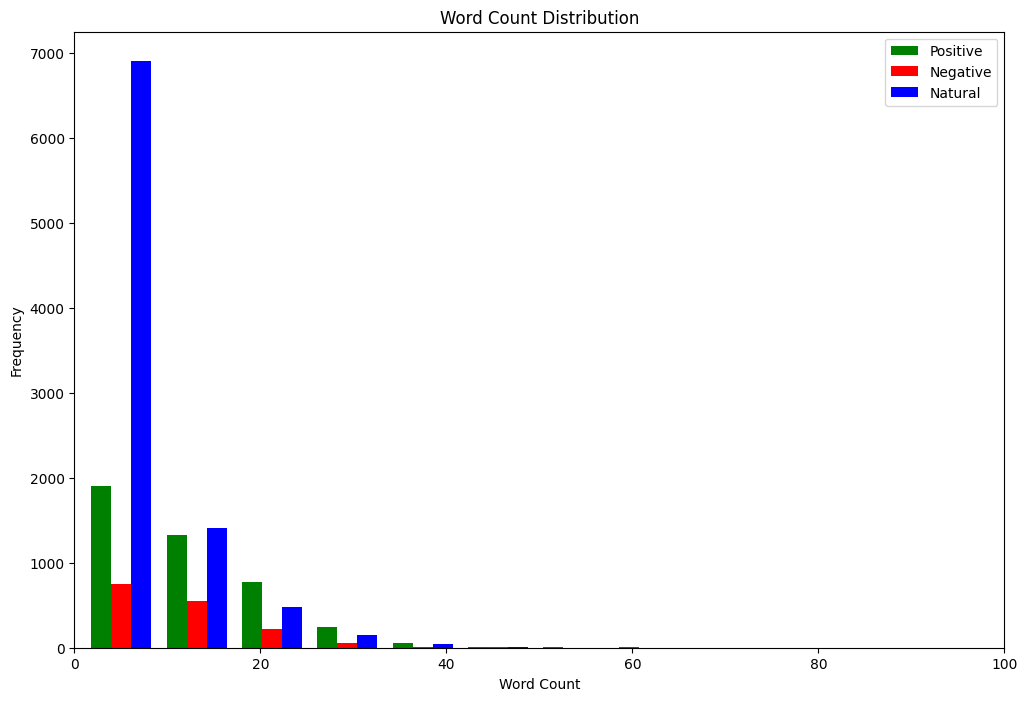

In [6]:
# plot word count distribution for all classes

df['word_count'] = df['text_clean'].apply(word_count)
pos = df['word_count'][df['sentiment'] == 'pos']
neg = df['word_count'][df['sentiment'] == 'neg']
neu = df['word_count'][df['sentiment'] == 'neu']
plt.figure(figsize=(12, 8))
plt.xlim(0, 100)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.hist([pos, neg, neu], color=['g', 'r', 'b'], label=['Positive', 'Negative', 'Natural'])
plt.legend(loc='upper right')


Plots a countplot using Seaborn to show the frequency of each sentiment class in the dataset.


<Axes: xlabel='sentiment', ylabel='count'>

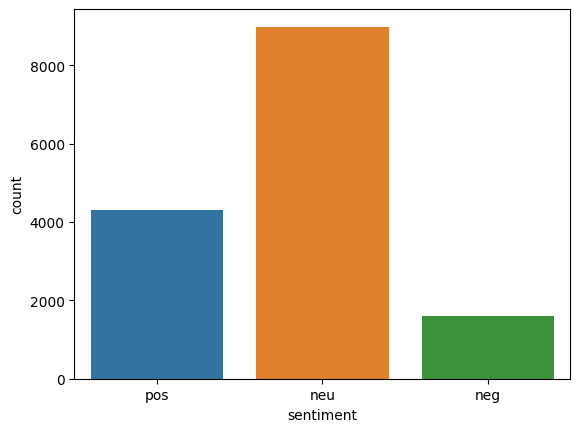

In [7]:
%matplotlib inline

sns.countplot(x='sentiment', data=df)

Calculates the 20 most common words in the entire dataset and the 20 most common words in the negative sentiment class.


In [8]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(df['text_clean']):
    words = str(line).split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)


[('semarang', 6958),
 ('kampus', 1754),
 ('udinus', 903),
 ('jawa', 692),
 ('kota', 656),
 ('dom', 631),
 ('ndes', 588),
 ('banget', 571),
 ('informasi', 531),
 ('universitas', 490),
 ('jalan', 458),
 ('nya', 402),
 ('tengah', 392),
 ('mas', 391),
 ('mahasiswa', 388),
 ('selamat', 381),
 ('orang', 375),
 ('kerja', 374),
 ('amp', 370),
 ('jakarta', 363)]

In [9]:
# get word in negative class
neg_words = []
for line in list(df['text_clean'][df['sentiment'] == 'neg']):
    words = str(line).split()
    for word in words:
      if(len(word)>2):
        neg_words.append(word.lower())

neg_words = Counter(neg_words).most_common(20)
neg_words

[('semarang', 850),
 ('kampus', 245),
 ('lengkap', 138),
 ('gagal', 126),
 ('jasa', 124),
 ('klik', 122),
 ('informasi', 115),
 ('lupa', 109),
 ('kota', 103),
 ('salah', 98),
 ('kadin', 98),
 ('banget', 96),
 ('jakarta', 95),
 ('kerja', 88),
 ('malang', 81),
 ('udinus', 79),
 ('ndes', 79),
 ('kkntematik', 73),
 ('orang', 66),
 ('gtgt', 66)]

Defines a function called plot_word_cloud which plots a word cloud for the given text.


In [15]:
from wordcloud import ImageColorGenerator


# plot word cloud for all classes

def plot_word_cloud(text, mask=None, max_words=2000, max_font_size=100, figure_size=(24.0, 16.0),
                    title = None, title_size=40, image_color=False):
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords.words('indonesian'),
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          width=800,
                          height=400,
                          mask=mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size,
                                   'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size,
                                   'color': 'black',
                                   'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()



Plots a word cloud for the entire dataset, the positive sentiment class, the negative sentiment class, and the neutral sentiment class.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


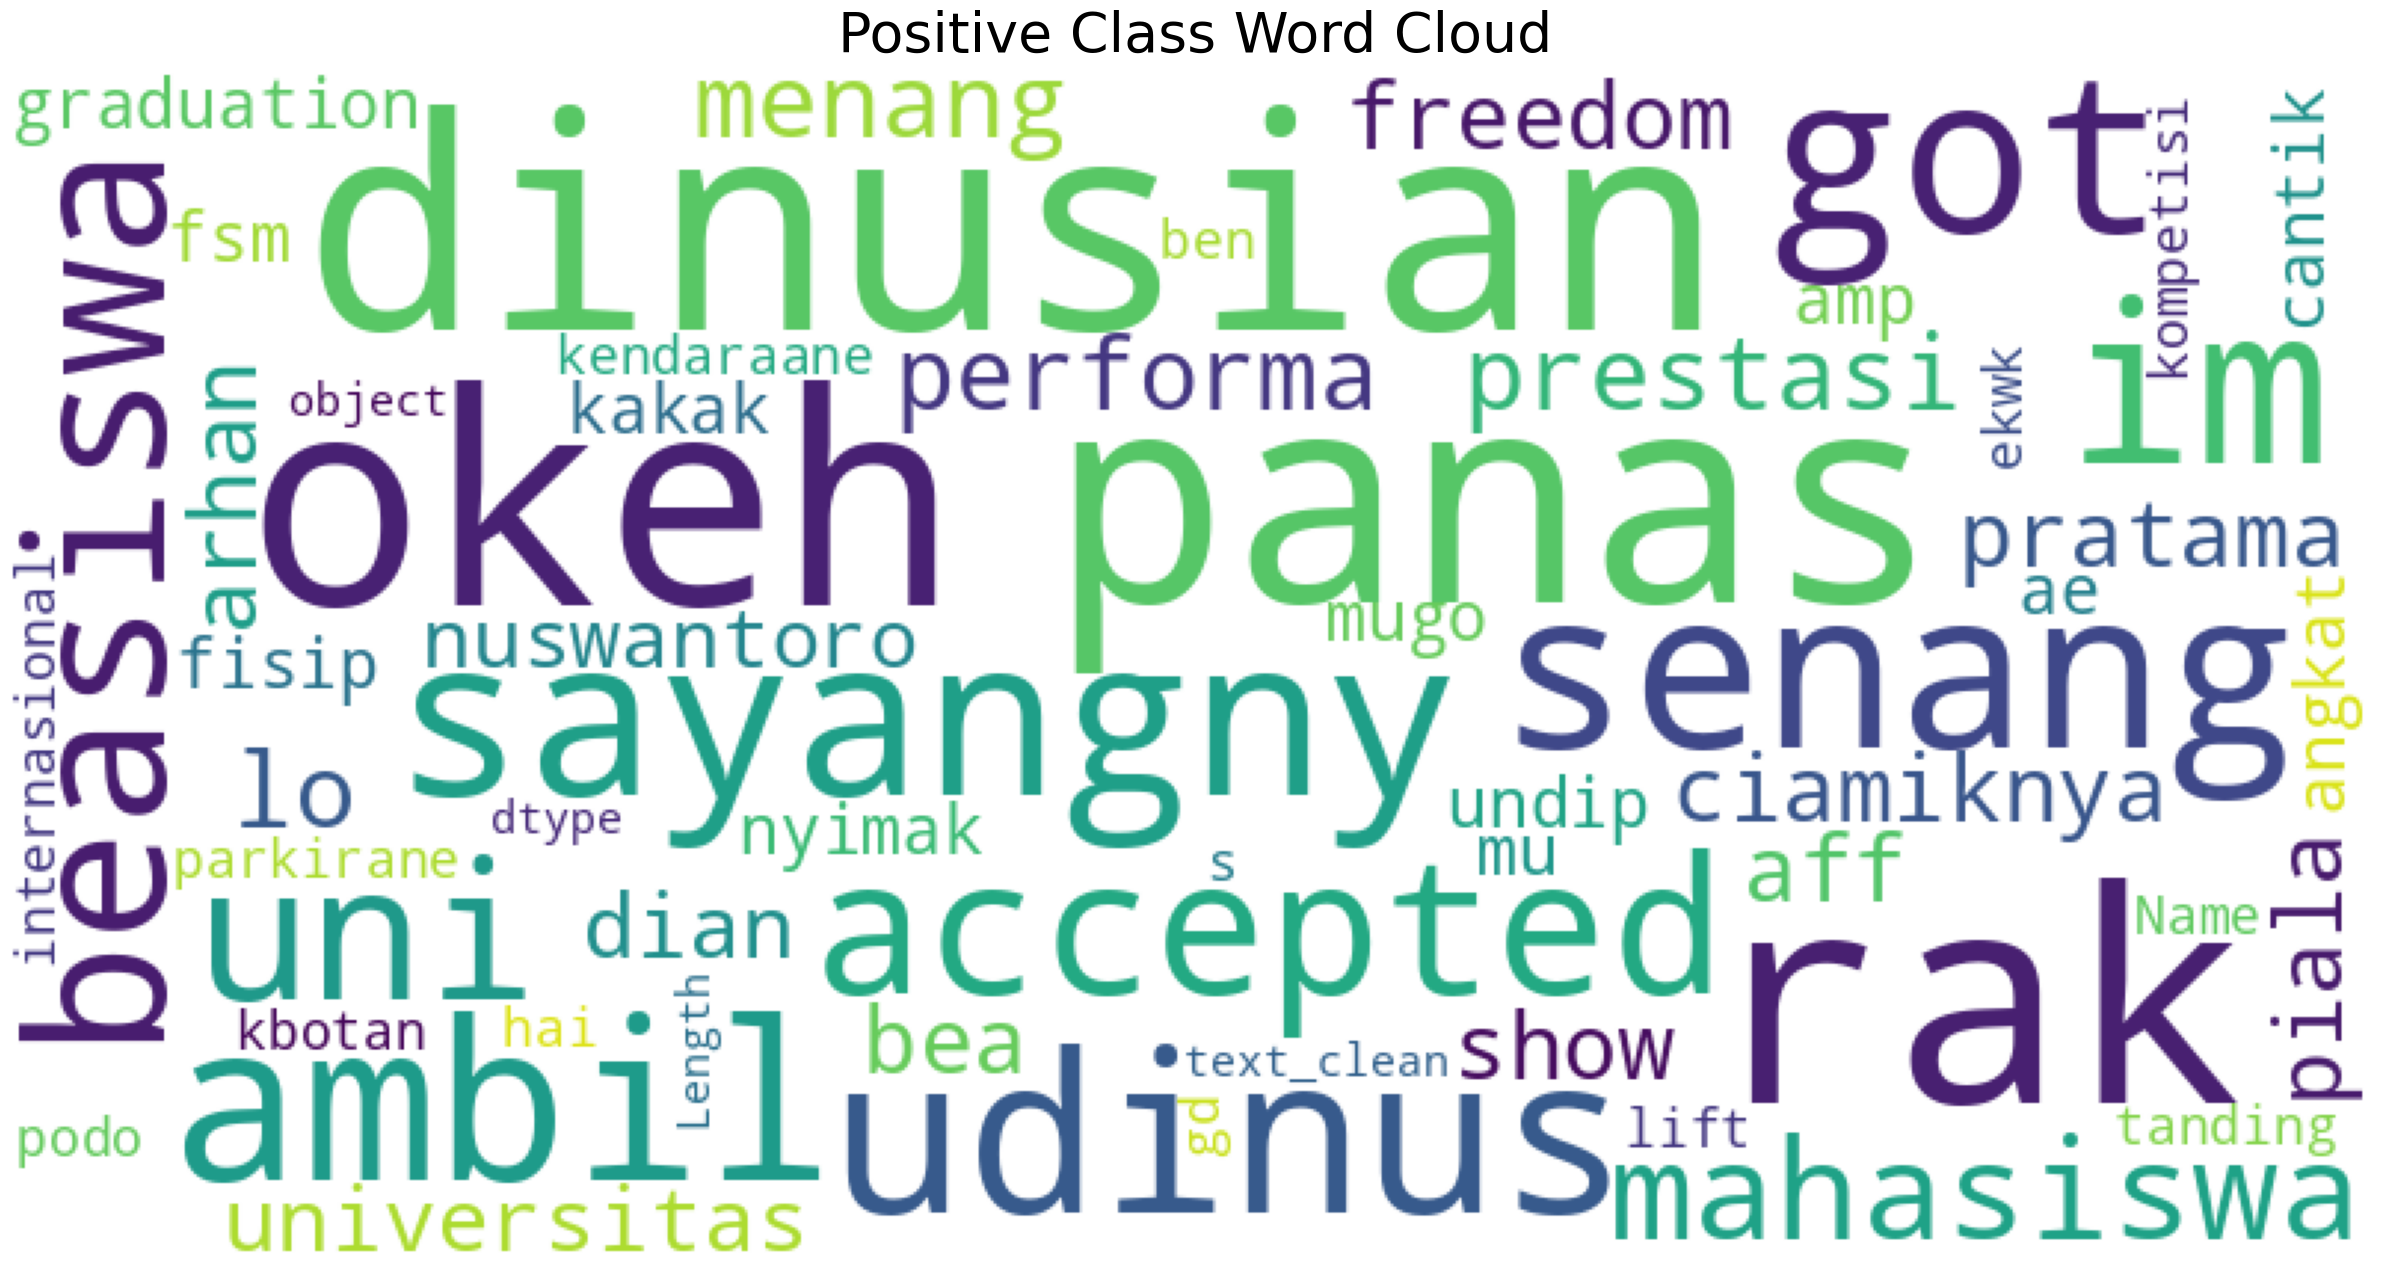

In [17]:
import nltk
nltk.download('stopwords')

# plot word cloud for positive class
plot_word_cloud(df['text_clean'][df['sentiment'] == 'pos'], title="Positive Class Word Cloud")


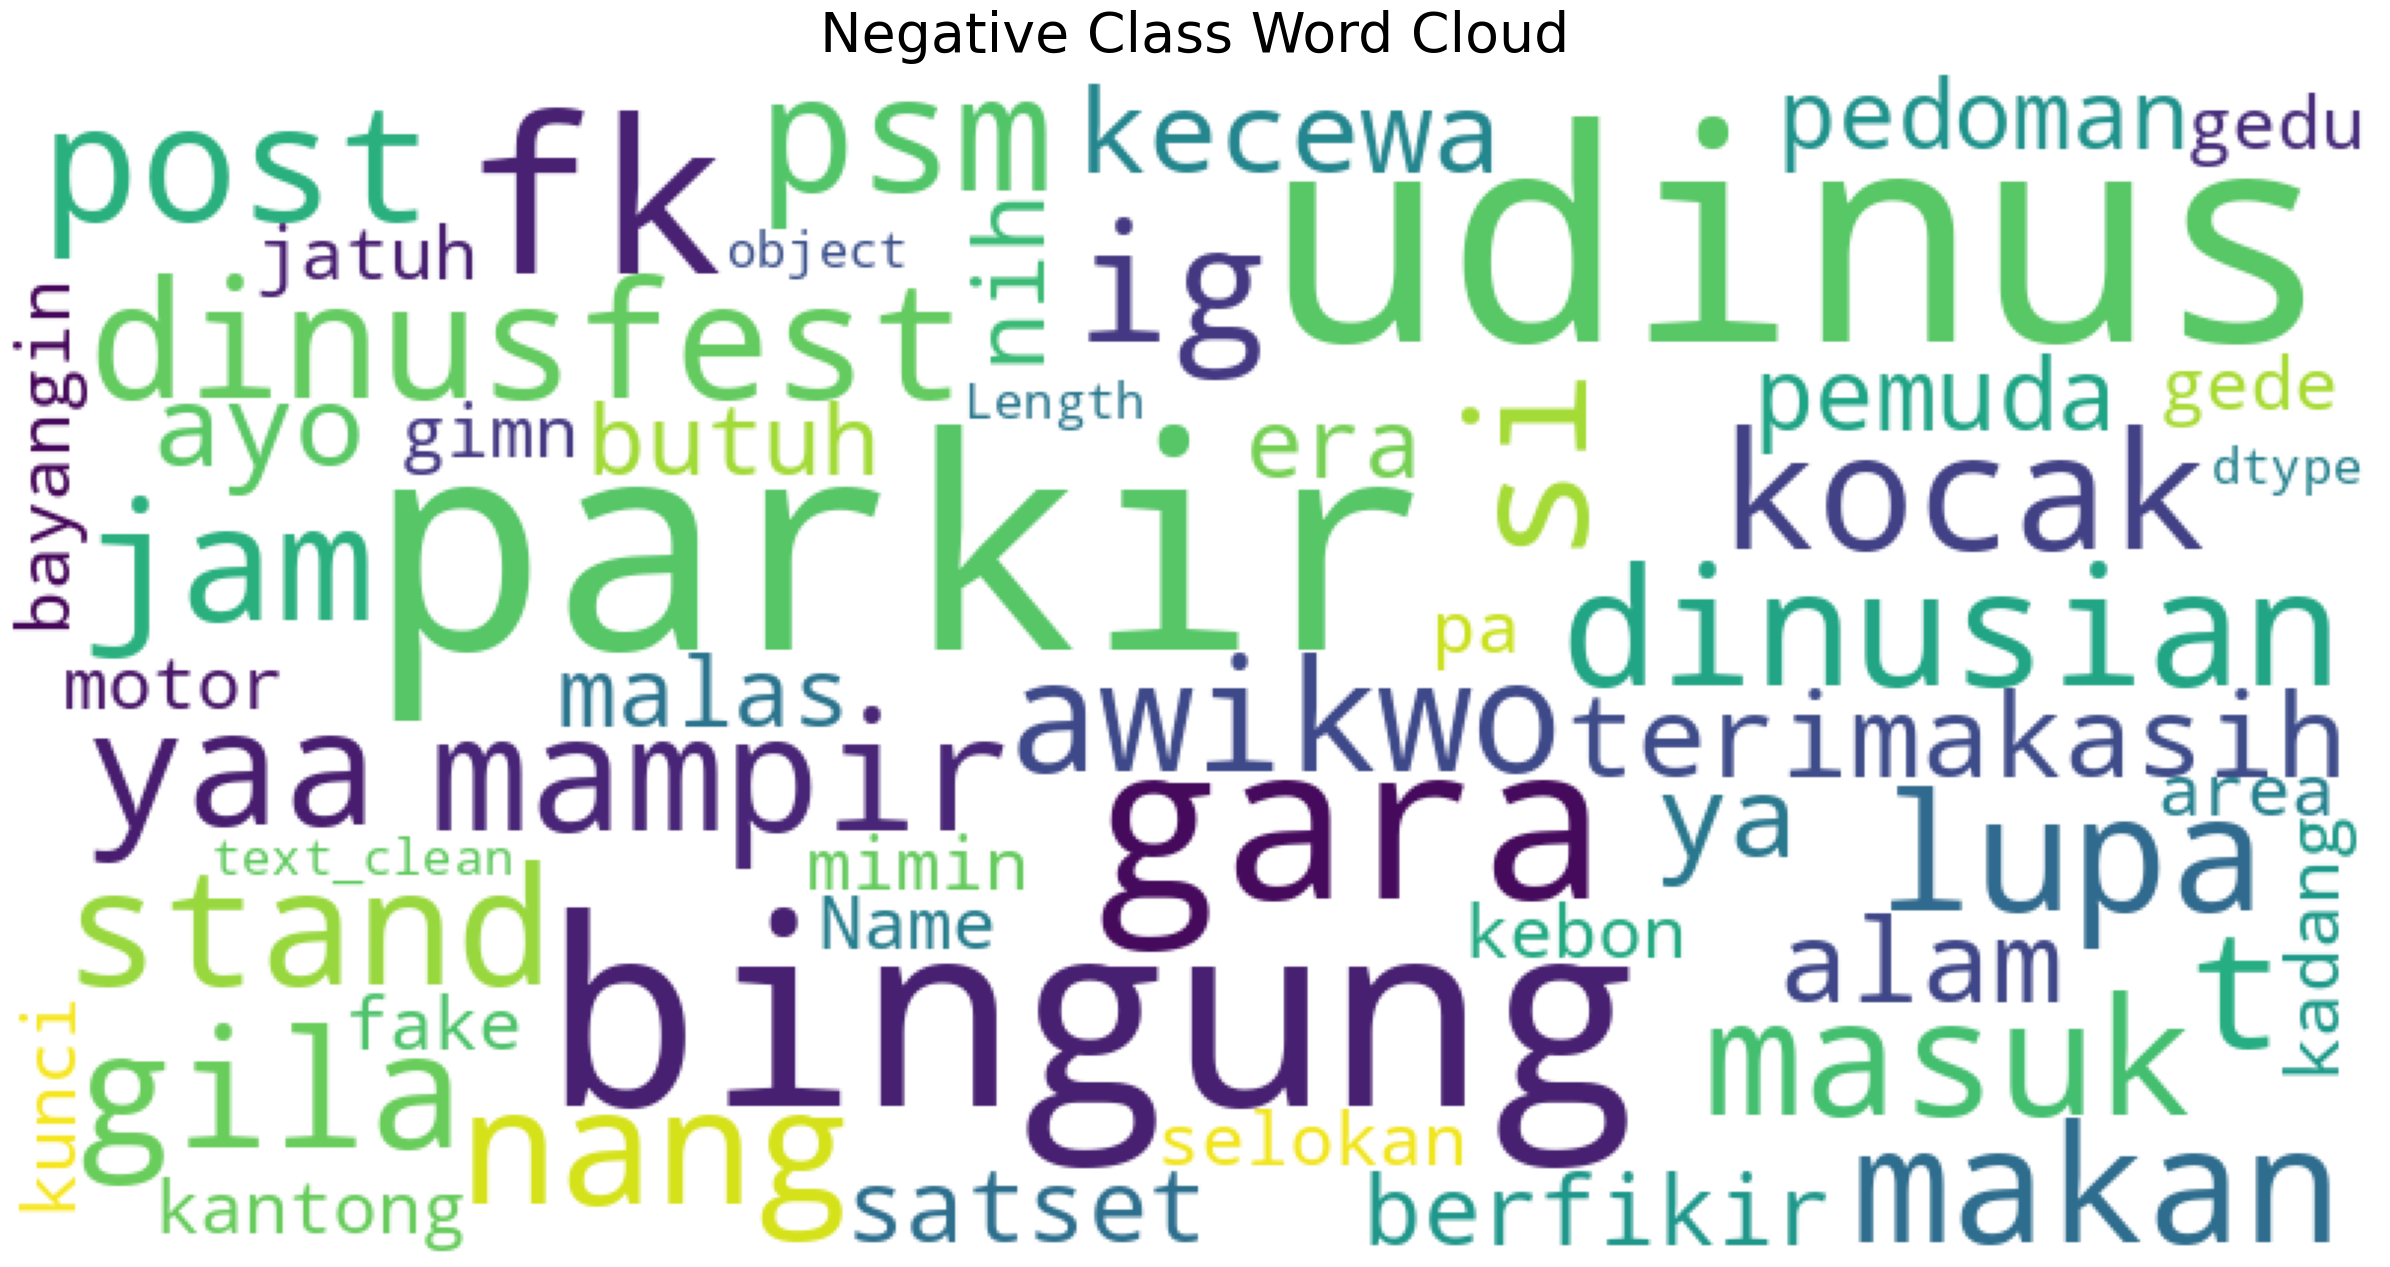

In [18]:
# plot word cloud for negative class
plot_word_cloud(df['text_clean'][df['sentiment'] == 'neg'], title="Negative Class Word Cloud")

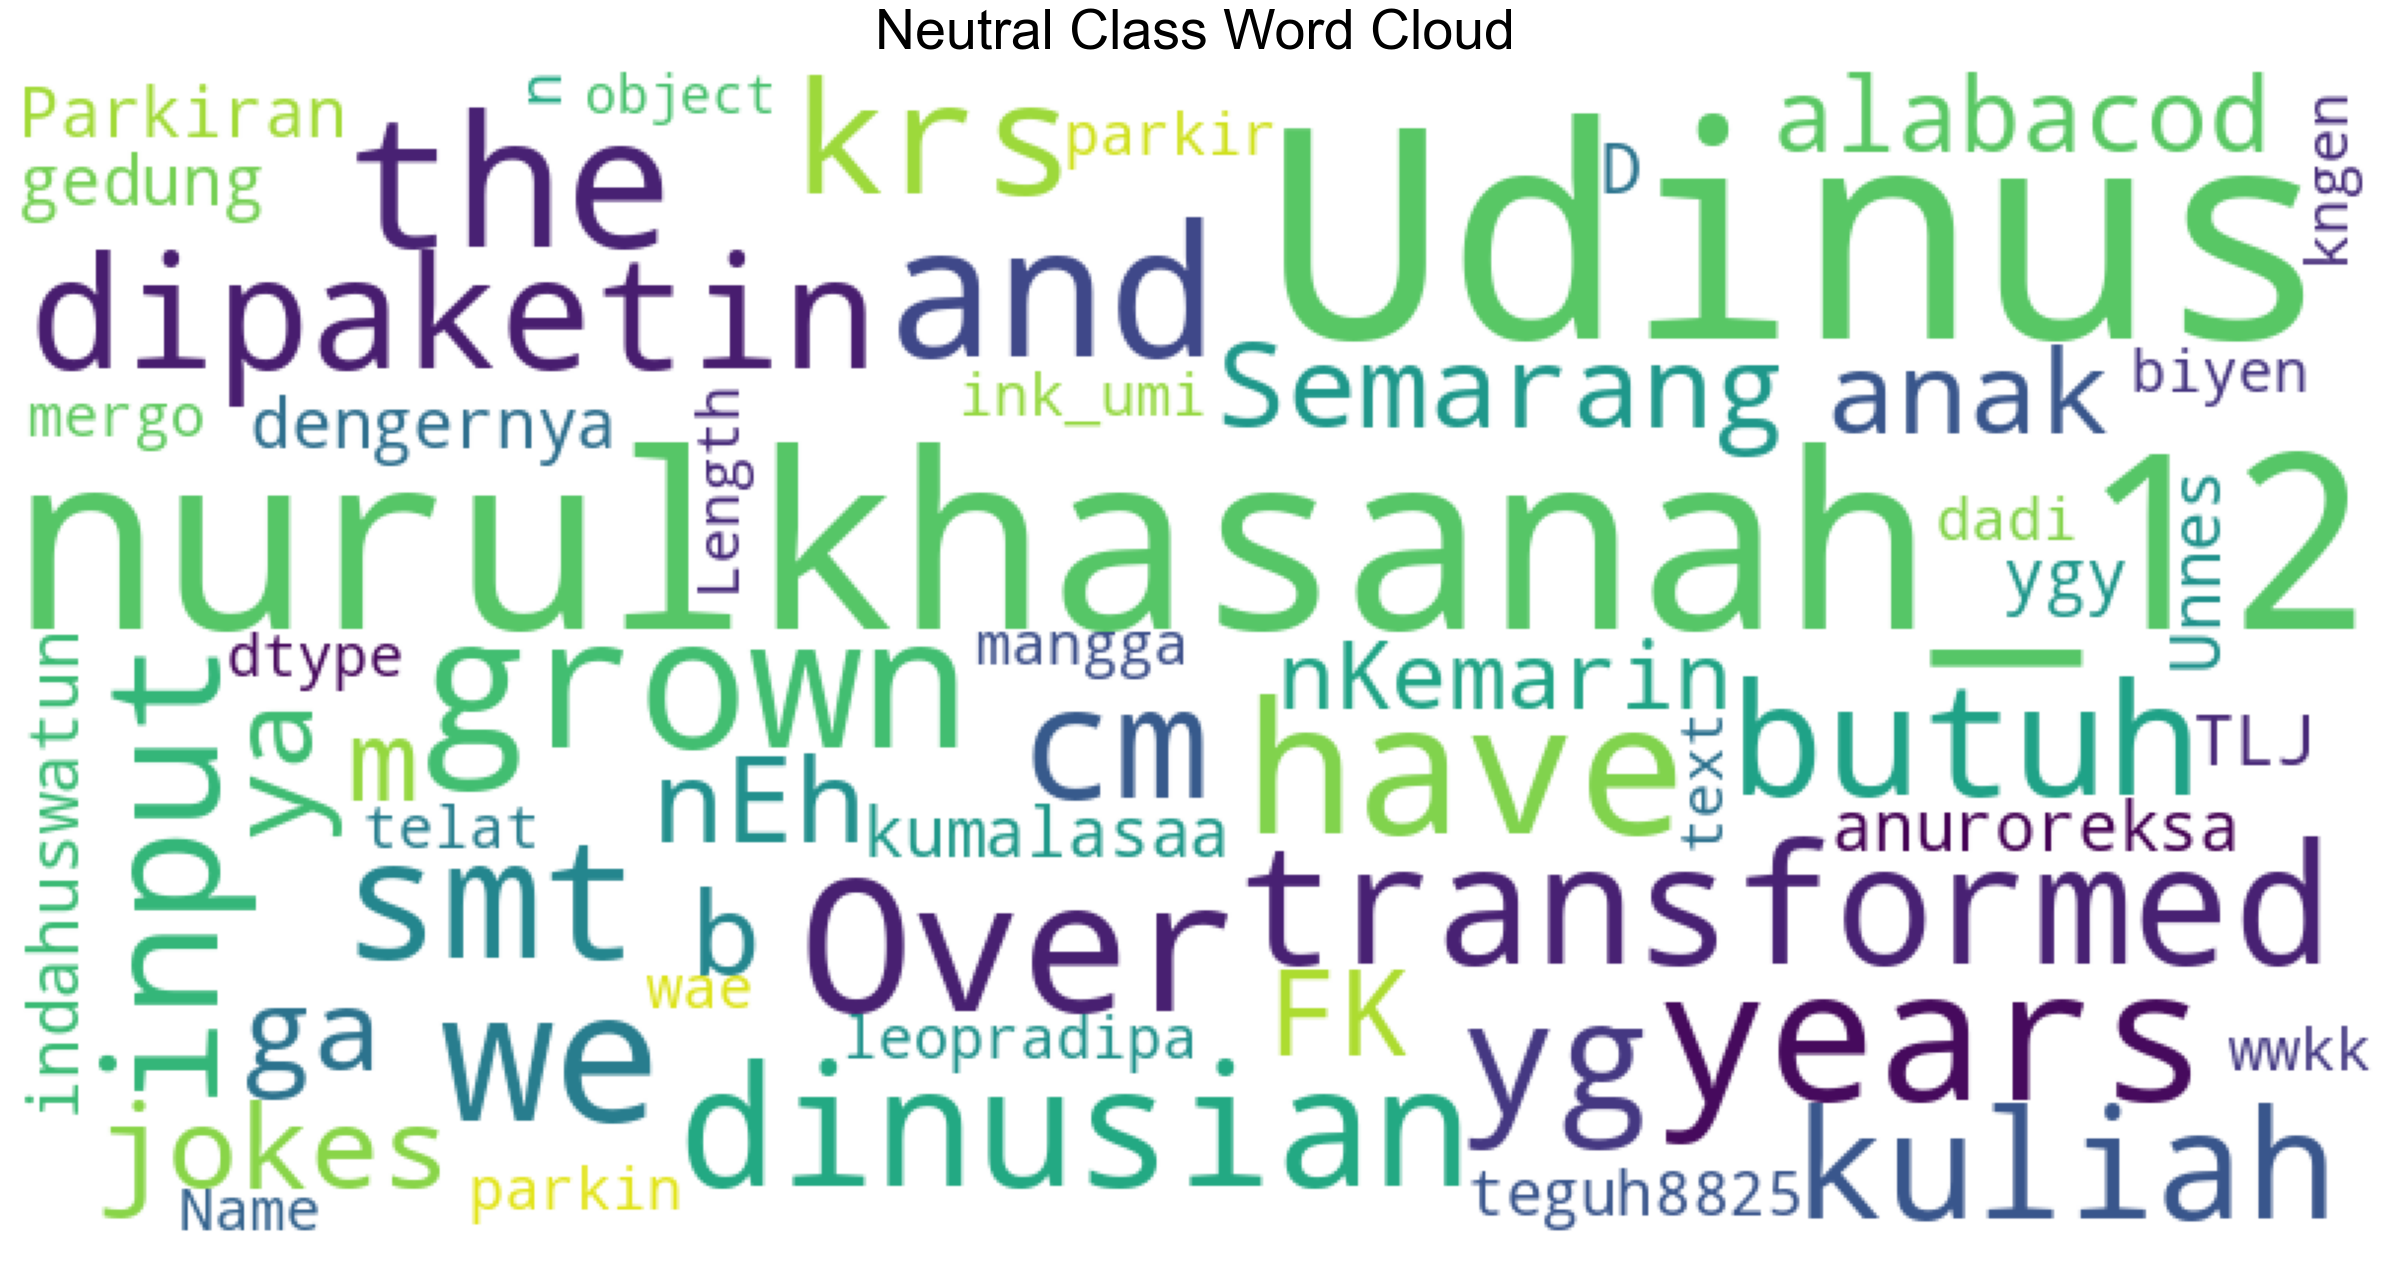

In [ ]:
# plot word cloud for neutral class
plot_word_cloud(df['text'][df['sentiment'] == 'neu'], title="Neutral Class Word Cloud")

### Balancing dataset

Balances the dataset by upsampling the minority classes (negative and positive sentiment classes) to match the number of samples in the neutral sentiment class.

In [12]:
# balanced using resampling
from sklearn.utils import resample

# separate classes
df_pos = df[df['sentiment'] == 'pos']
df_neg = df[df['sentiment'] == 'neg']
df_neu = df[df['sentiment'] == 'neu']

# upsample minority
df_pos_upsampled = resample(df_pos,
                          replace=True, # sample with replacement
                          n_samples=len(df_neu), # match number in majority class
                          random_state=27) # reproducible results

df_neg_upsampled = resample(df_neg,
                            replace=True, # sample with replacement
                            n_samples=len(df_neu), # match number in majority class
                            random_state=27) # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([df_pos_upsampled, df_neu, df_neg_upsampled])


# check new class counts
df_upsampled['sentiment'].value_counts()


pos    8986
neu    8986
neg    8986
Name: sentiment, dtype: int64

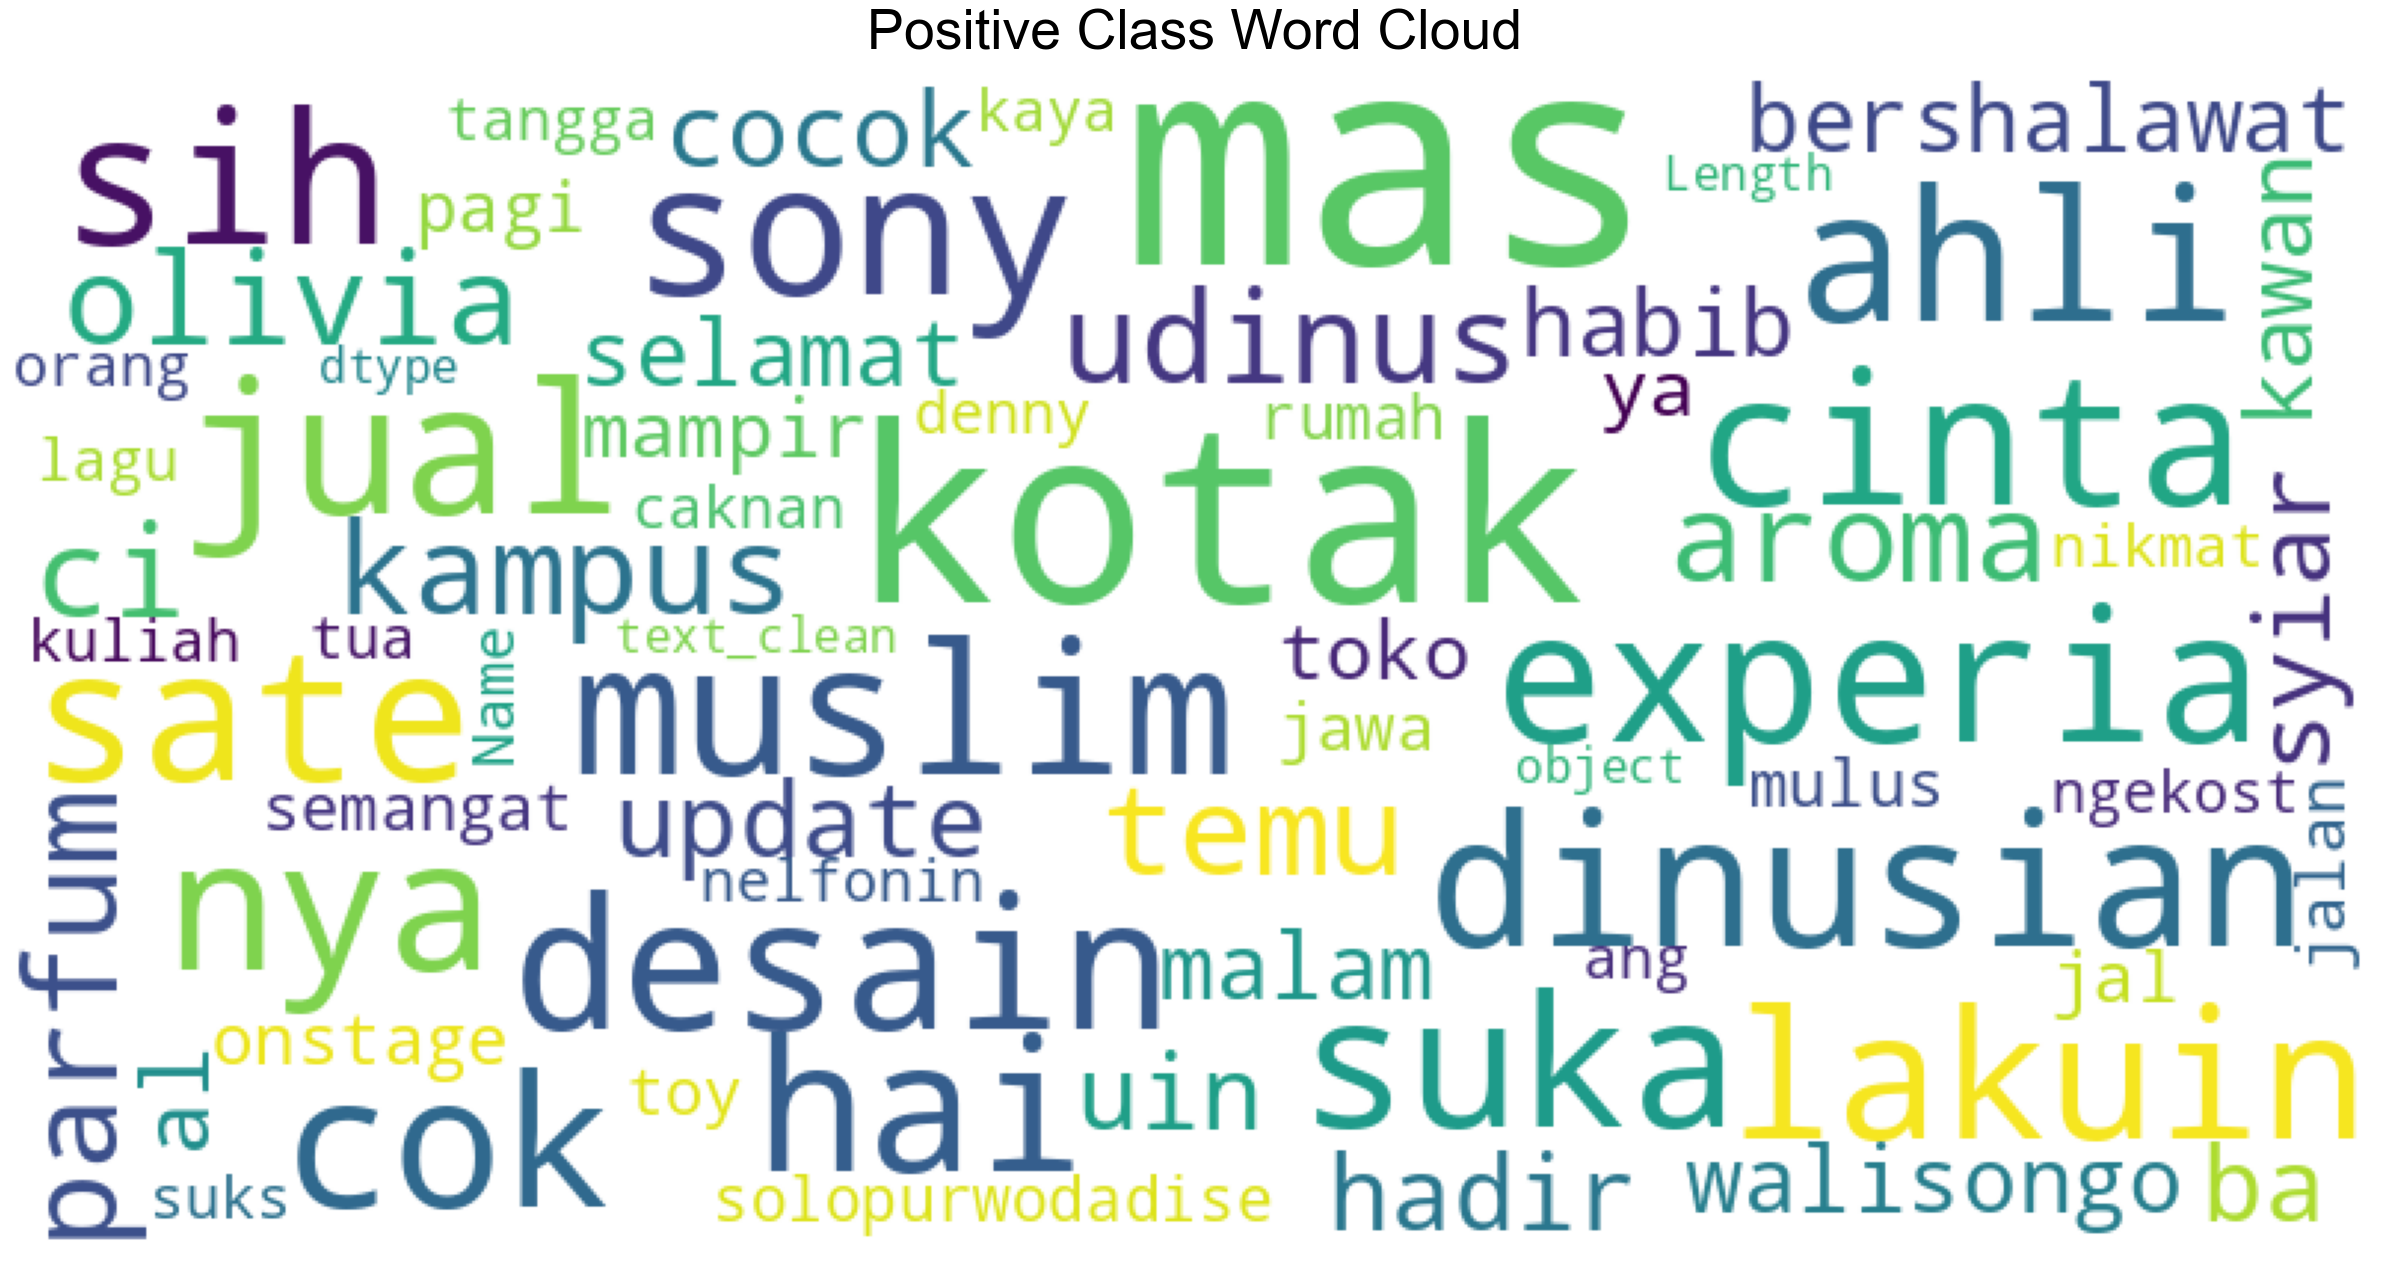

In [15]:
# plot word cloud for positive class
plot_word_cloud(df_upsampled['text_clean'][df_upsampled['sentiment'] == 'pos'], title="Positive Class Word Cloud")


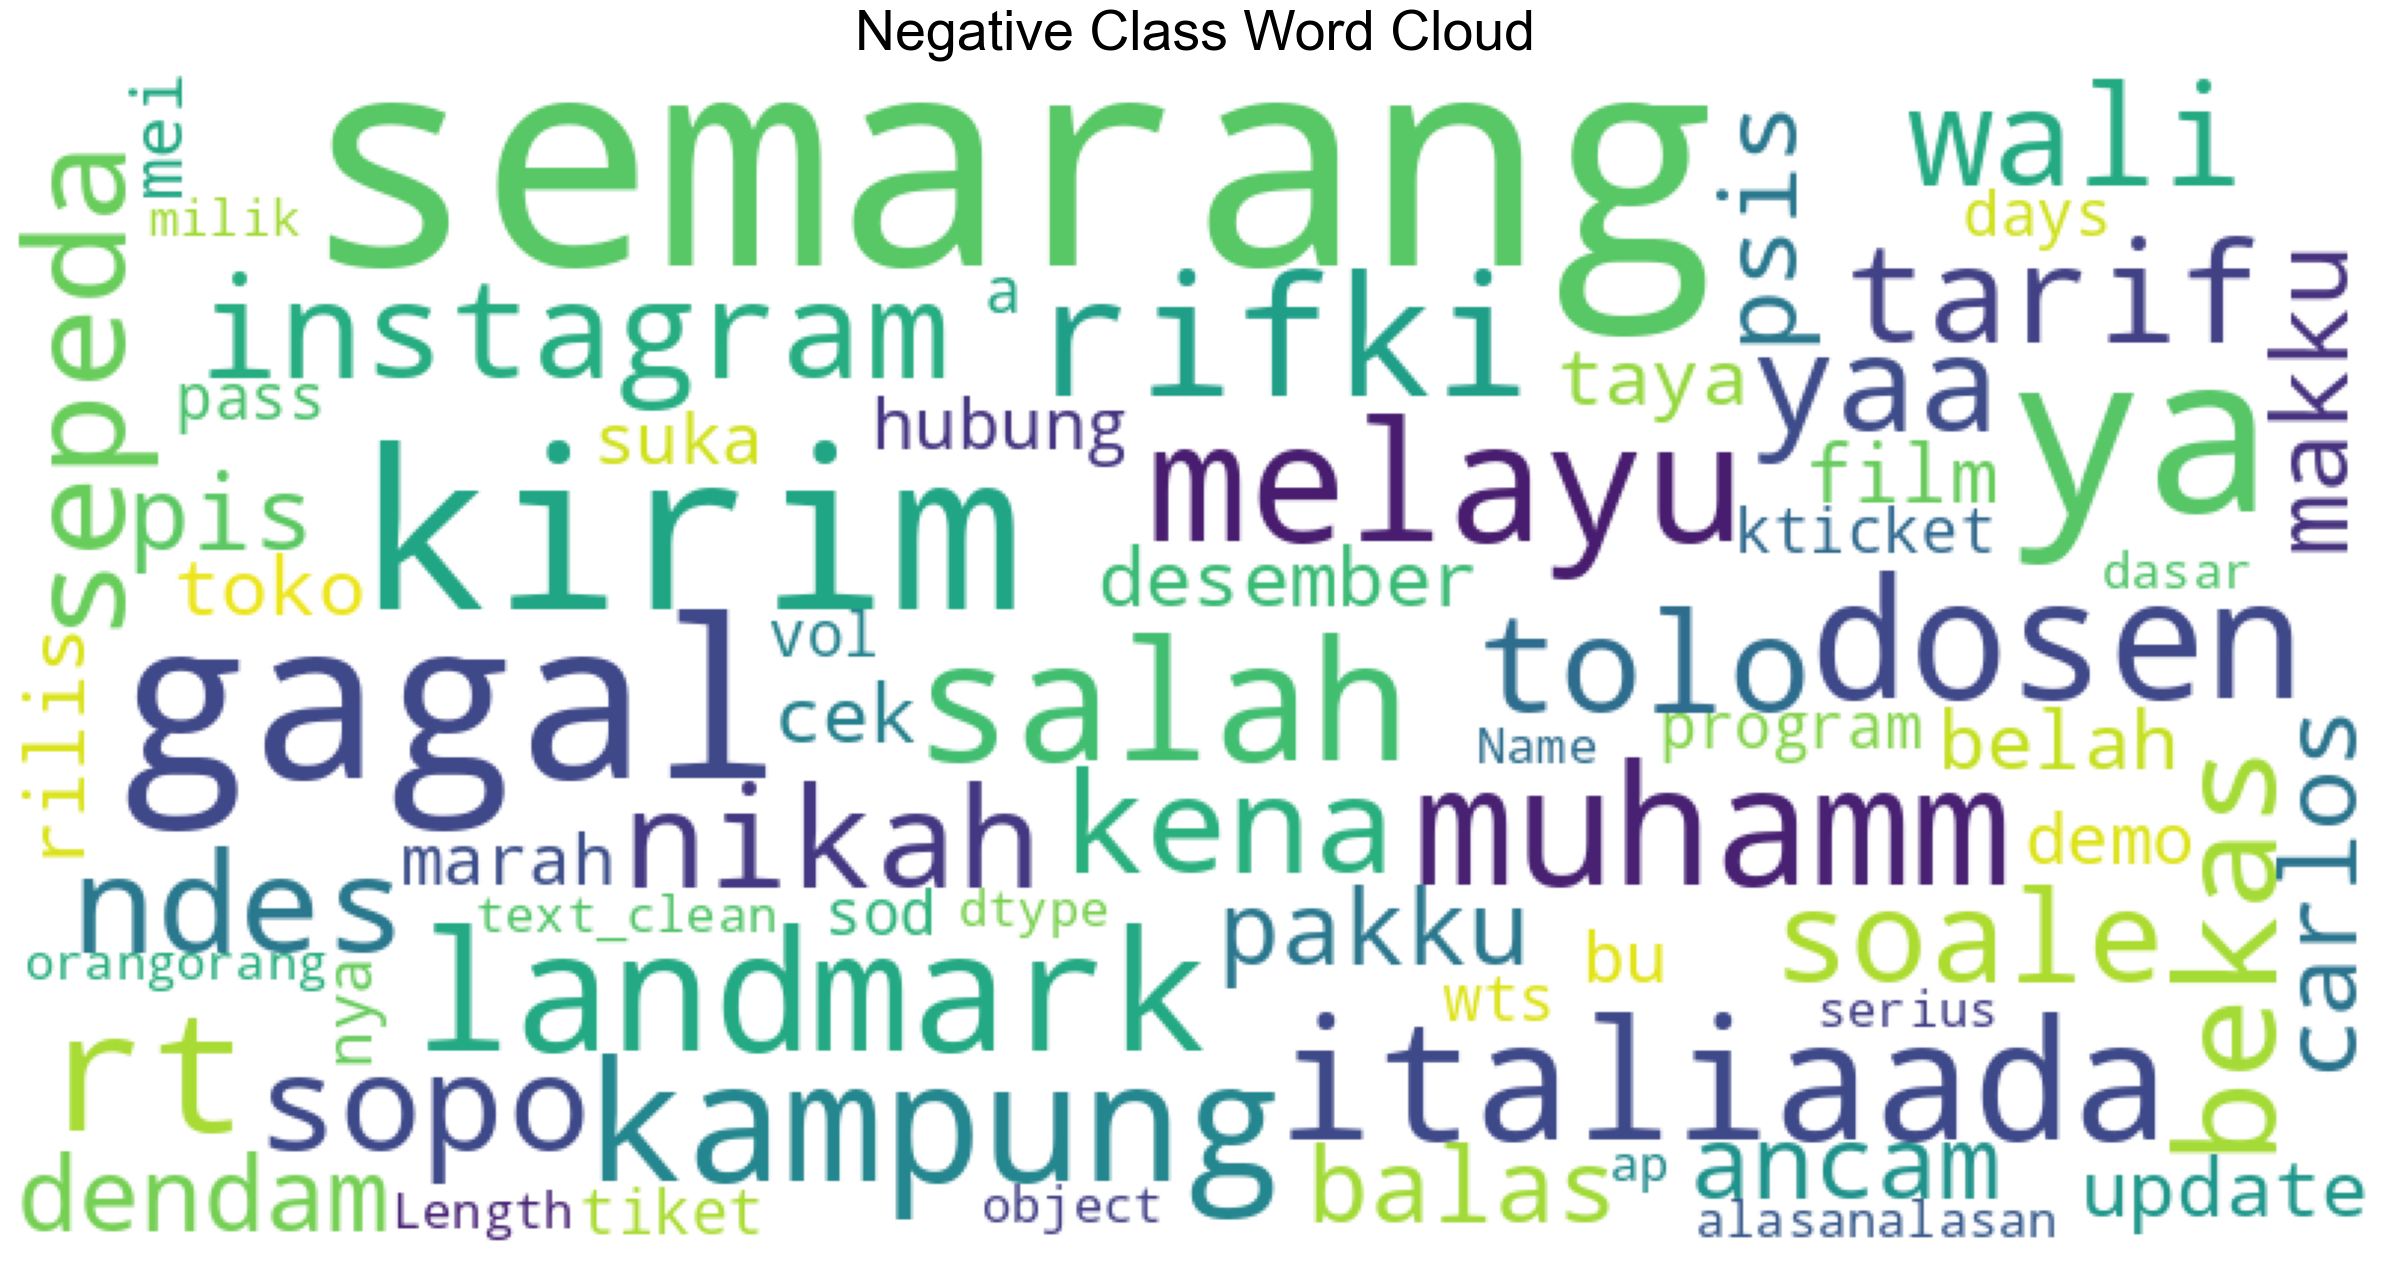

In [16]:
# plot word cloud for negative class
plot_word_cloud(df_upsampled['text_clean'][df_upsampled['sentiment'] == 'neg'], title="Negative Class Word Cloud")

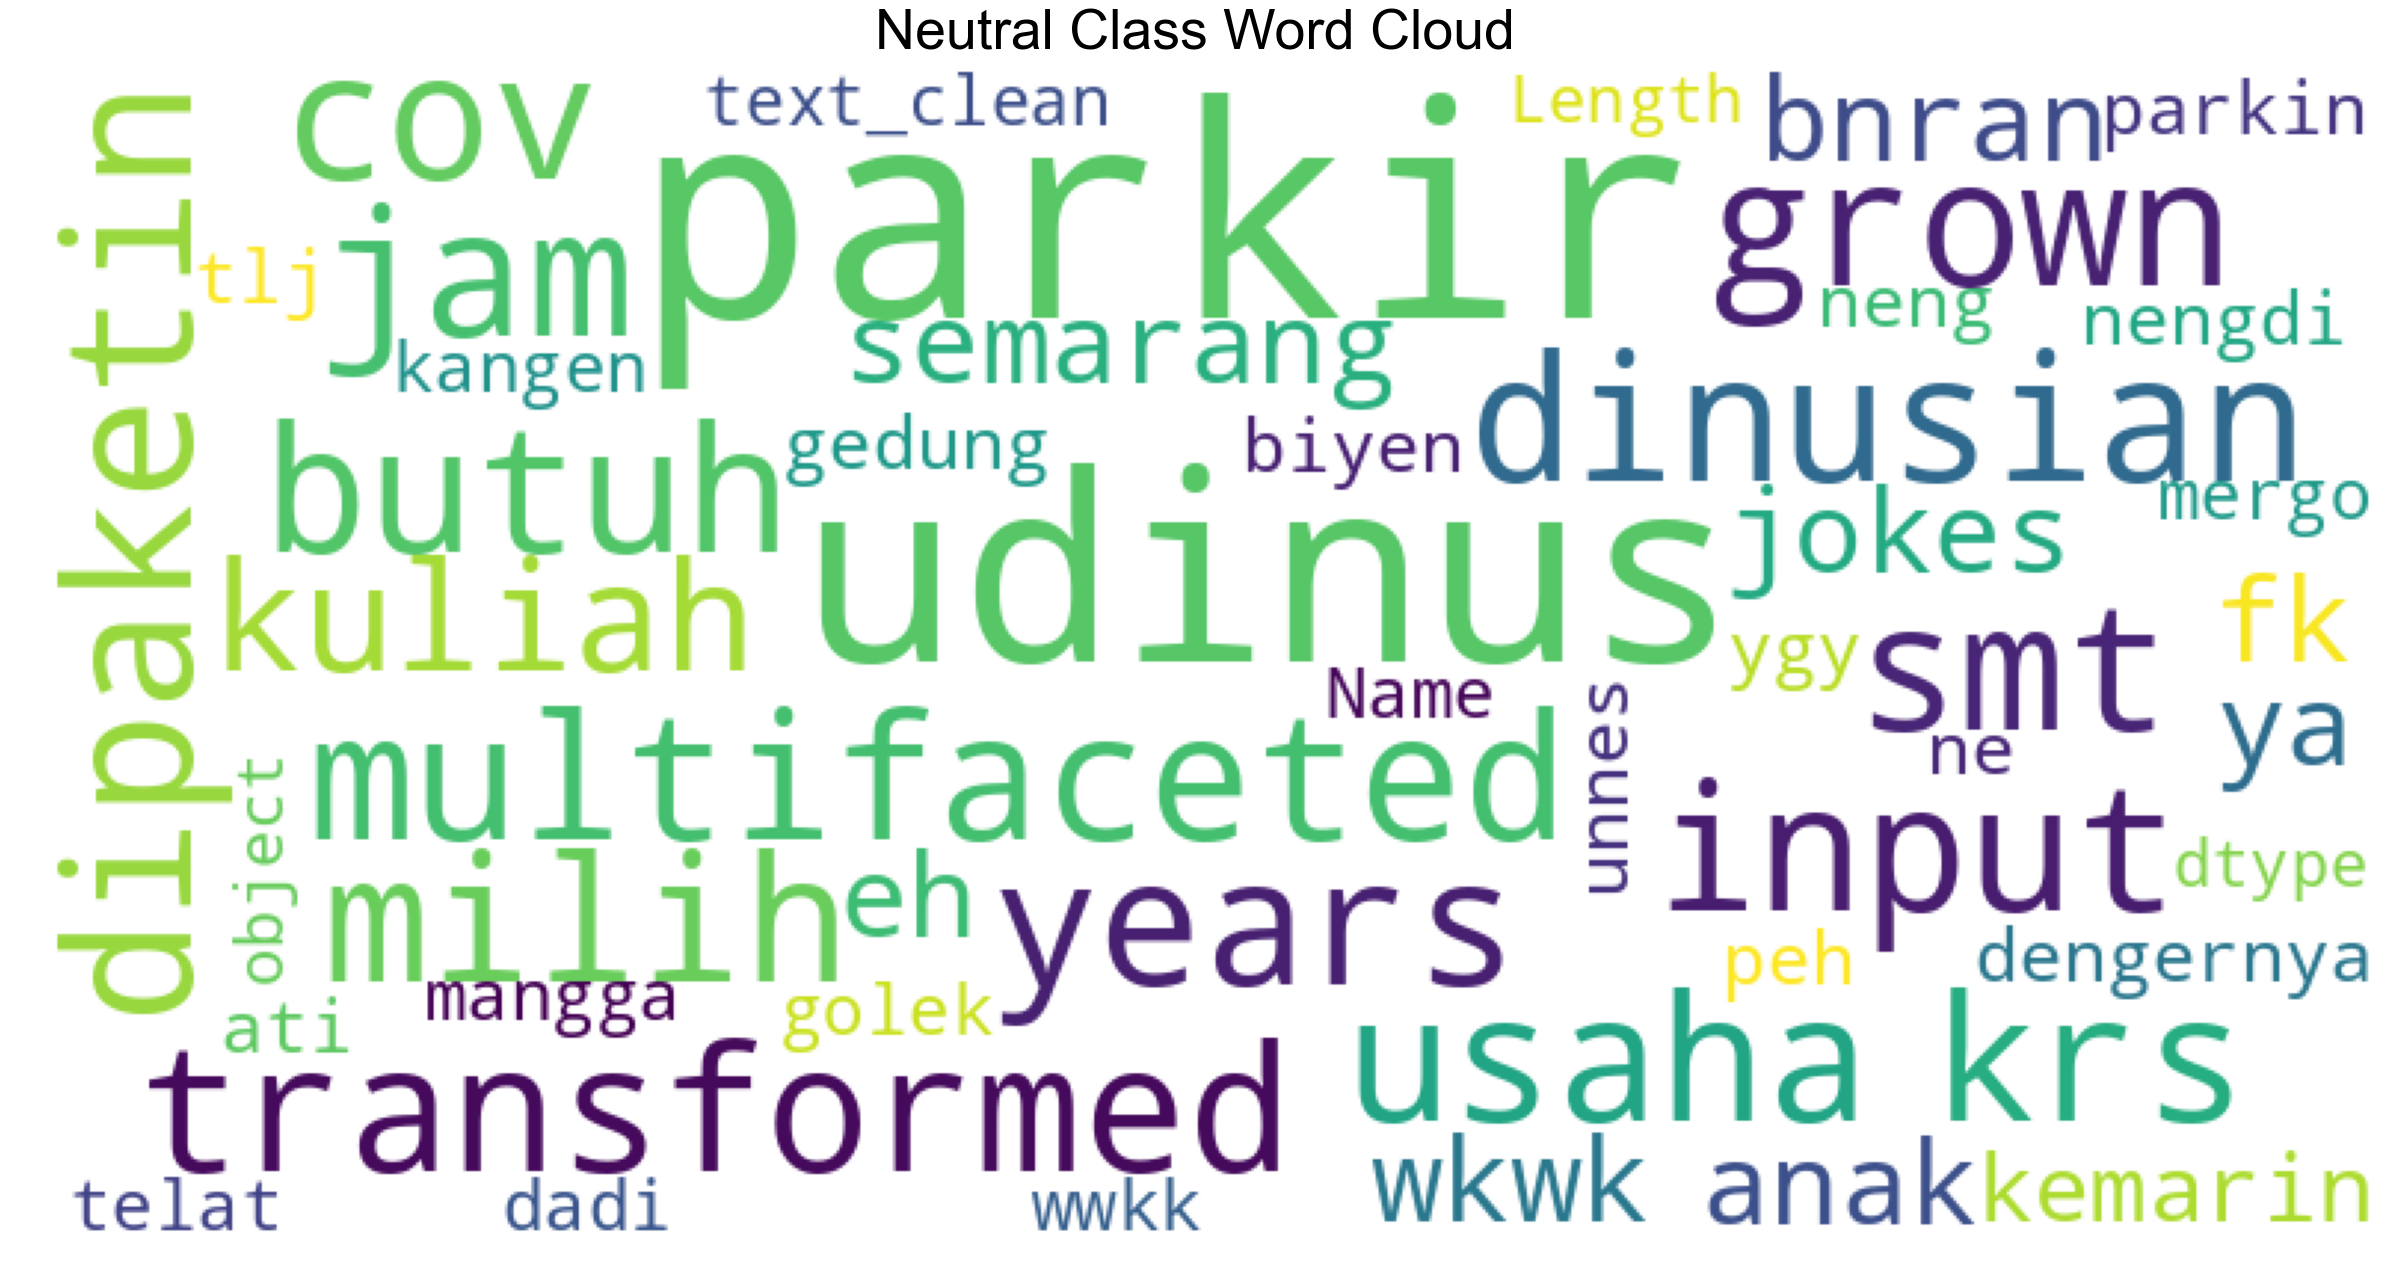

In [17]:
# plot word cloud for neutral class
plot_word_cloud(df_upsampled['text_clean'][df_upsampled['sentiment'] == 'neu'], title="Neutral Class Word Cloud")


<AxesSubplot: >

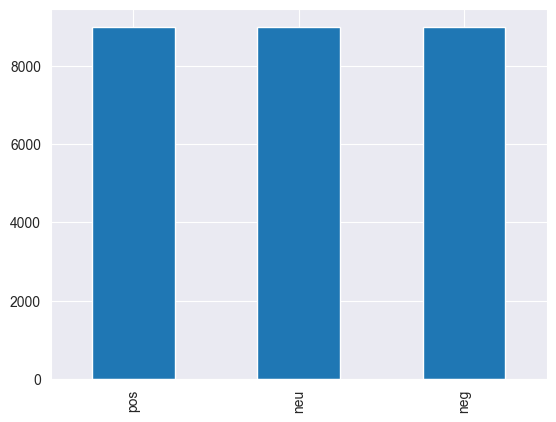

In [18]:
df_upsampled['sentiment'].value_counts().plot(kind='bar')

Saves the upsampled dataset to a csv file.

In [19]:
# save upsampled dataset
df_upsampled.to_csv('../data/processed/upsampled.csv', index=False)


### Vectorization and Splitting dataset


In [27]:
df = pd.read_csv('../data/processed/upsampled.csv')
df.dropna(inplace=True)

In [19]:
X = df['text_clean']
y = df['sentiment']

print(X.shape)
print(y.shape)

(14900,)
(14900,)


### Convert text to word frequency vectors with TfidfVectorizer

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

In [20]:
#Convert a collection of raw documents to a matrix of TF-IDF features.

vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

Vector fitted.
No. of feature_words:  18780


In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)


(21566, 18347)
(5392, 18347)
(21566,)
(5392,)


### RNN Training and Evaluating Models

#### RNN with LSTM
RNN with LSTM is used to train the model. The model is trained for 10 epochs and the loss and accuracy are plotted.

In [22]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


In [25]:
import keras
keras.__version__

'2.12.0'

#### Prepare data for RNN
tokenize the text and convert it to a sequence of integers.
`pad_sequences` is used to ensure that all sequences in a list have the same length.
`max_words` is the maximum number of words to keep, based on word frequency. Only the most common max_words-1 words will be kept.
`max_len` is the maximum length of all sequences.

In [23]:
max_words = 2000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
text = pad_sequences(sequences, maxlen=max_len)

print('Shape of data tensor:', text.shape)
print(text)

Shape of data tensor: (14900, 200)
[[   0    0    0 ...    4    2    3]
 [   0    0    0 ...   56  532  221]
 [   0    0    0 ...   59   23   16]
 ...
 [   0    0    0 ...  294   20  660]
 [   0    0    0 ... 1361  871  650]
 [   0    0    0 ...  204  827  688]]


### Splitting dataset into training and testing

The dataset is split into training and testing sets with a 80:20 ratio.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42)

Print the shape of the training and testing sets.

In [25]:
# convert class labels to on-hot encoding
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values
print('Shape of label tensor:', y_train.shape)


Shape of label tensor: (11920, 3)


#### RNN with LSTM model

Model dibawah adalah sebuah model deep learning yang menggunakan arsitektur jaringan saraf tiruan yang disebut Sequential. Terdapat 4 lapisan dalam model tersebut:

Lapisan Embedding: Lapisan ini mengubah setiap indeks kata dalam teks masukan menjadi representasi vektor numerik. Lapisan ini memiliki 3 parameter:

max_words: Jumlah maksimum kata yang dapat dikenali dalam teks masukan.
embedding_vector_length: Ukuran vektor hasil embedding setiap kata.
input_length: Panjang teks masukan.
Lapisan Bidirectional LSTM: Lapisan ini adalah lapisan Long Short-Term Memory (LSTM) yang berfungsi untuk menangani masalah pemrosesan teks dalam urutan yang kompleks. Lapisan ini menggunakan teknik bidirectional untuk memproses teks masukan dalam arah depan dan mundur, membuat model lebih baik dalam memahami konteks teks. Lapisan ini memiliki 2 parameter:

LSTM(100): Ukuran hidden state dalam setiap LSTM unit.
dropout=0.2, recurrent_dropout=0.2: Nilai dropout untuk mencegah overfitting.
Lapisan Dense: Lapisan ini adalah lapisan fully connected (dense) yang berfungsi untuk mengubah representasi output dari LSTM menjadi representasi yang lebih sederhana dan mudah diterjemahkan ke kelas masukan. Lapisan ini memiliki 2 parameter:

Dense(64, activation='relu'): Ukuran output dan fungsi aktivasi relu.
Dense(3, activation='softmax'): Ukuran output dan fungsi aktivasi softmax untuk menghasilkan probabilitas terhadap kelas masukan.
Kompilasi model: Langkah terakhir adalah menentukan optimizer, fungsi loss, dan metric yang digunakan untuk melatih model. Dalam hal ini, model dikompilasi dengan menggunakan optimizer 'adam', fungsi loss 'categorical_crossentropy', dan metric 'accuracy'.

Dengan demikian, arsitektur model tersebut adalah sebuah model deep learning yang menggunakan lapisan embedding, bidirectional LSTM, dan 2 lapisan dense untuk memproses teks masukan dan menentukan kelas masukan.





In [29]:
from keras.layers import Bidirectional

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(max_words, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 183,459
Trainable params: 183,459
Non-trainable params: 0
_________________________________________________________________
None


#### Training the model

In [30]:
# fit the model
batch_size = 32
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2)



Epoch 1/10


373/373 - 226s - loss: 0.7555 - accuracy: 0.6903 - 226s/epoch - 605ms/step
Epoch 2/10
373/373 - 219s - loss: 0.5204 - accuracy: 0.8171 - 219s/epoch - 587ms/step
Epoch 3/10
373/373 - 212s - loss: 0.4328 - accuracy: 0.8508 - 212s/epoch - 569ms/step
Epoch 4/10
373/373 - 201s - loss: 0.3949 - accuracy: 0.8633 - 201s/epoch - 538ms/step
Epoch 5/10
373/373 - 196s - loss: 0.3668 - accuracy: 0.8729 - 196s/epoch - 526ms/step
Epoch 6/10
373/373 - 190s - loss: 0.3435 - accuracy: 0.8802 - 190s/epoch - 508ms/step
Epoch 7/10
373/373 - 186s - loss: 0.3259 - accuracy: 0.8874 - 186s/epoch - 500ms/step
Epoch 8/10
373/373 - 185s - loss: 0.3049 - accuracy: 0.8940 - 185s/epoch - 495ms/step
Epoch 9/10
373/373 - 183s - loss: 0.2937 - accuracy: 0.8949 - 183s/epoch - 490ms/step
Epoch 10/10
373/373 - 187s - loss: 0.2663 - accuracy: 0.9072 - 187s/epoch - 500ms/step


#### Evaluating the model


In [31]:
# evaluate the model
score, acc = model.evaluate(X_test, y_test, verbose=2, batch_size=batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))



94/94 - 8s - loss: 0.7055 - accuracy: 0.8171 - 8s/epoch - 81ms/step
score: 0.71
acc: 0.82


#### Predicting sentiment

In [32]:
# predict sentiment
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


94/94 [==============================] - 8s 81ms/step


#### Classification report and confusion matrix

Classification report adalah sebuah hasil evaluasi dari sebuah model klasifikasi yang menunjukkan performa model dalam memprediksi label pada data uji. Dalam hal ini, terdapat tiga label yaitu 0, 1, dan 2. Maka, hasil evaluasi akan memperlihatkan performa model pada tiap label tersebut.

Untuk setiap label, ada empat metrik yang ditunjukkan, yaitu:

precision: jumlah prediksi benar untuk label tersebut dibagi dengan jumlah total prediksi untuk label tersebut. Precision menunjukkan seberapa baik model menghindari prediksi salah untuk label tersebut.
recall: jumlah prediksi benar untuk label tersebut dibagi dengan jumlah total data asli untuk label tersebut. Recall menunjukkan seberapa baik model memprediksi label tersebut dari seluruh data asli yang memilikinya.
f1-score: rata-rata harmonis antara precision dan recall. F1-score memberikan gambaran performa secara keseluruhan pada label tersebut.
support: jumlah data asli untuk label tersebut.
Dari hasil dibawah, dapat dilihat bahwa model memiliki performa yang baik untuk label 0 dan 2, namun sedikit kurang baik untuk label 1. Secara keseluruhan, model memiliki akurasi sebesar 91%.

***Precision, Recall, dan F1-Score adalah tiga metrik yang sering digunakan dalam evaluasi performa suatu model klasifikasi. Masing-masing memiliki rumus sebagai berikut:***

###### Precision
Precision mengukur seberapa sering model memprediksi suatu label yang benar dalam sekumpulan label yang diprediksikan sebagai positive. Precision dapat didefinisikan sebagai:

$Precision = \frac{True Positives}{True Positives + False Positives}$

###### Recall
Recall mengukur seberapa sering model memprediksi suatu label sebagai positive dalam sekumpulan label yang sebenarnya positive. Recall dapat didefinisikan sebagai:

$Recall = \frac{True Positives}{True Positives + False Negatives}$

###### F1-Score
F1-Score adalah rata-rata harmonis (harmonic mean) dari precision dan recall. F1-Score memiliki rumus sebagai berikut:

$F1-Score = 2 * \frac{Precision * Recall}{Precision + Recall}$

F1-Score digunakan untuk mengukur keseimbangan antara precision dan recall, karena hanya memperhitungkan precision atau recall saja tidaklah cukup. Nilai F1-Score yang tinggi menunjukkan bahwa model memiliki performa yang baik dalam memprediksi positive class dan tidak memiliki false positive atau false negative yang terlalu banyak.


In [33]:
# print classification report
print('Classification Report')
print(classification_report(y_test, y_pred))



Classification Report
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       318
           1       0.85      0.88      0.86      1812
           2       0.79      0.78      0.79       850

    accuracy                           0.82      2980
   macro avg       0.77      0.74      0.76      2980
weighted avg       0.81      0.82      0.81      2980



#### Confusion matrix


Dapat di pahami bahwa:

1. Baris pertama: 1744 adalah jumlah prediksi positif yang benar, 19 adalah jumlah prediksi positif yang salah, dan 2 adalah jumlah data negatif yang diklasifikasikan sebagai positif.

2. Baris kedua: 124 adalah jumlah prediksi negatif yang salah, 1473 adalah jumlah prediksi negatif yang benar, dan 199 adalah jumlah data positif yang diklasifikasikan sebagai negatif.

3. Baris ketiga: 16 adalah jumlah prediksi negatif yang salah, 101 adalah jumlah prediksi negatif yang benar, dan 1714 adalah jumlah data positif yang diklasifikasikan sebagai positif.

Dari hasil confusion matrix ini, dapat dilihat bahwa model memiliki tingkat akurasi yang cukup baik, namun masih ada beberapa kesalahan dalam klasifikasi. Tingkat kesalahan dapat dianalisis lebih lanjut untuk memperbaiki model pembelajaran mesin.

In [34]:
# print confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 181  111   26]
 [  70 1589  153]
 [  17  168  665]]


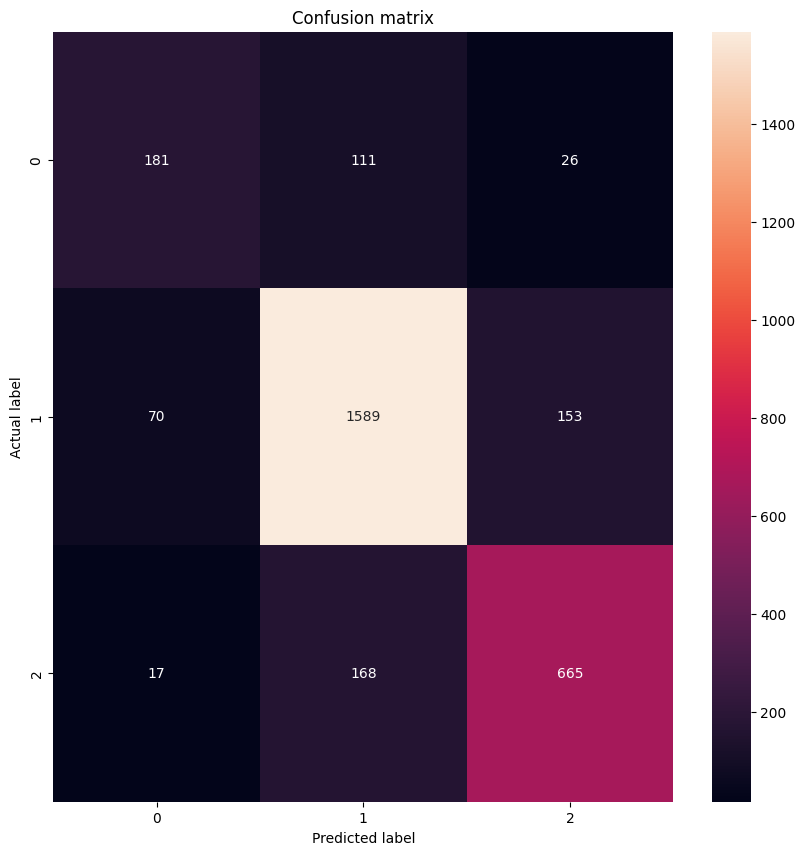

In [35]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')

plt.xlabel('Predicted label')
plt.show()


In [36]:
# test model with custom input

sequence = tokenizer.texts_to_sequences(['saya senang menjadi mahasiswa dinusian'])
data = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(data)

if np.argmax(pred) == 0:
    print('Neutral')
elif np.argmax(pred) == 1:
    print('Negative')
else:
    print('Positive')



1/1 [==============================] - 0s 88ms/step
Positive


#### Save model

In [ ]:
# save tokenizer
import pickle
with open('../models/tokenizerupsample_ep_10.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [38]:
# save vectorizer
import pickle
with open('../models/vectorizerupsample_ep_10.pickle', 'wb') as handle:
    pickle.dump(vector, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [39]:
model.save('model_10_nobalance.h5')

#### Load model

In [6]:
# load model
from keras.models import load_model
model = load_model('../models/model_10_nobalance.h5')


In [ ]:
# load tokenizer
import pickle
with open('../models/tokenizerupsample_ep_10.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [8]:
# load vectorizer
import pickle
with open('../models/vectorizerupsample_ep_10.pickle', 'rb') as handle:
    vector = pickle.load(handle)


In [26]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=32)
print("score: %.2f" % (test_loss))
print("acc: %.2f" % (test_acc))



94/94 - 5s - loss: 0.7055 - accuracy: 0.8171 - 5s/epoch - 53ms/step
score: 0.71
acc: 0.82


#### Plotting

The model is trained for 10 epochs with batch size of 32. The model is trained using Adam optimizer with learning rate of 0.001. The model is trained using early stopping and model checkpoint callback. The model is evaluated using accuracy and loss metrics.


Epoch 1/5
540/540 [==============================] - 519s 960ms/step - loss: 0.1195 - accuracy: 0.9588 - val_loss: 0.1358 - val_accuracy: 0.9525
Epoch 2/5
540/540 [==============================] - 500s 925ms/step - loss: 0.1059 - accuracy: 0.9624 - val_loss: 0.1485 - val_accuracy: 0.9474
Epoch 3/5
540/540 [==============================] - 499s 924ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 0.1442 - val_accuracy: 0.9536
Epoch 4/5
540/540 [==============================] - 500s 924ms/step - loss: 0.0956 - accuracy: 0.9666 - val_loss: 0.1591 - val_accuracy: 0.9497
Epoch 5/5
674/674 [==============================] - 95s 138ms/step - loss: 0.0774 - accuracy: 0.9762
Evaluation result on Train Data : Loss = 0.07741575688123703, accuracy = 0.9762125611305237
169/169 [==============================] - 24s 140ms/step - loss: 0.3096 - accuracy: 0.9223
Evaluation result on Test Data : Loss = 0.3096020221710205, accuracy = 0.9222922921180725


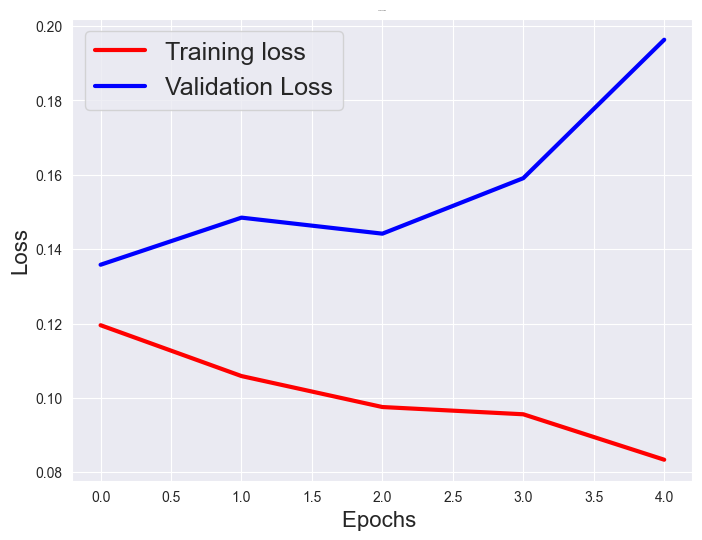

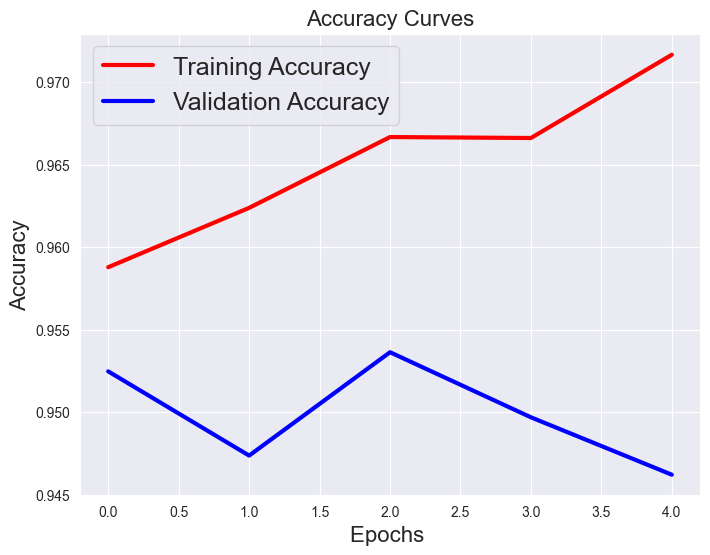

In [37]:


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='../models/modelupsample_ep_10.h5',
                      monitor='val_accuracy', mode='max', save_best_only=True)
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2,
callbacks=[checkpoint_callback, earlystopping_callback])

model=tf.keras.models.load_model('../models/modelupsample_ep_10.h5')
[train_loss, train_accuracy] = model.evaluate(X_train, y_train)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_accuracy))
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

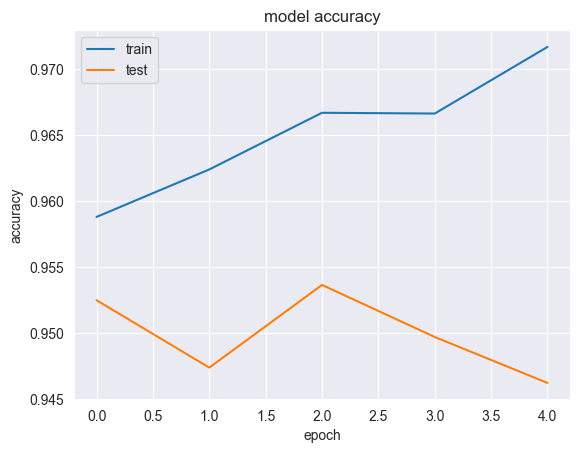

In [38]:
# visualize accuracy and loss

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# save model with pickle
import pickle
with open('../models/model_5.pkl', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)



INFO:tensorflow:Assets written to: ram://3635aeac-d611-4e74-a363-18d6dbadf7b2/assets


In [45]:
#  You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')

# save model with joblib
import joblib

joblib.dump(model, '../models/model_5.joblib')


INFO:tensorflow:Assets written to: ram://82cf3b30-1a35-4b1c-8dc9-7602806a4eba/assets


['../models/model_5.joblib']

In [ ]:
# load model with pickle

import pickle
with open('D:\Dev\Learning\sentiment_analysis_udinus\models\model_5.pkl', 'rb') as handle:
    pickle_model = pickle.load(handle)

In [27]:
# predict sentiment using real data
sequence = tokenizer.texts_to_sequences(['saya senang menjadi mahasiswa dinusian'])
data = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(data)

if np.argmax(pred) == 0:
    print('Neutral')
elif np.argmax(pred) == 1:
    print('Negative')
else:
    print('Positive')


1/1 [==============================] - 0s 443ms/step
Positive


### Deployment using Gradio

In [29]:
import gradio as gr

def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    data = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(data)

    if np.argmax(pred) == 0:
        return f'Neutral{pred}'
    elif np.argmax(pred) == 1:
        return f'Negative{pred}'
    else:
        return f'Positive{pred}'

iface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text")
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 37ms/step
